# Análisis de los resultados obtenidos

 Una vez obtenidos los resultados a todas las respuestas,procedemos a analizar y sacar conclusiones de los resultados obtenidos.
 Para ello, vamos a usar la libreria pandas de python que nos ayudará a manipular y analizar los datos


* ### Carga de los JSON en Dataframe

In [38]:
import json
import matplotlib.pyplot as plt
import pandas as pd

ruta_archivo_json_preguntas = './preguntas.json'
ruta_archivo_json_respuestas = './respuestas.json'
ruta_archivo_json_resultados = './resultados.json'

# Carga JSON preguntas

with open(ruta_archivo_json_preguntas) as archivo_json:
    datos_json = json.load(archivo_json)

preguntas = pd.DataFrame(datos_json)
preguntas = preguntas.drop(columns='id')
# Carga JSON respuestas

with open(ruta_archivo_json_respuestas) as archivo_json:
    datos_json = json.load(archivo_json)

respuestas = pd.DataFrame(datos_json)
respuestas = respuestas.drop(columns=['id_respuesta', 'id_pregunta'])
# Carga JSON resultados

with open(ruta_archivo_json_resultados) as archivo_json:
    datos_json = json.load(archivo_json)

valoracion = pd.DataFrame(datos_json)
valoracion = valoracion.drop(columns=['id_respuesta', 'id_pregunta'])

# Unir los tres DataFrames en uno solo
resultados = pd.concat([preguntas, respuestas, valoracion], axis=1)

## RESULTADOS GENERALES

Media General: 0.8761632068718683
Desviación Estándar General: 0.3294542295346602
Varianza General: 0.10854008935827657
                                       mean       std       var
tema                                                           
codigo                             0.880597  0.324608  0.105371
cultura general                    0.869121  0.337614  0.113983
definiciones de palabras           0.880851  0.324309  0.105176
logica con trampa, para adivinar   0.847495  0.359902  0.129530
operaciones matemáticas numericas  0.926174  0.261780  0.068529
traducción linguistica             0.854348  0.353141  0.124709


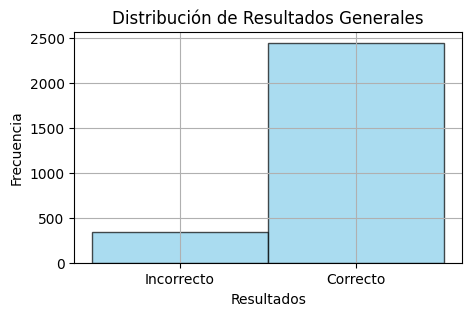

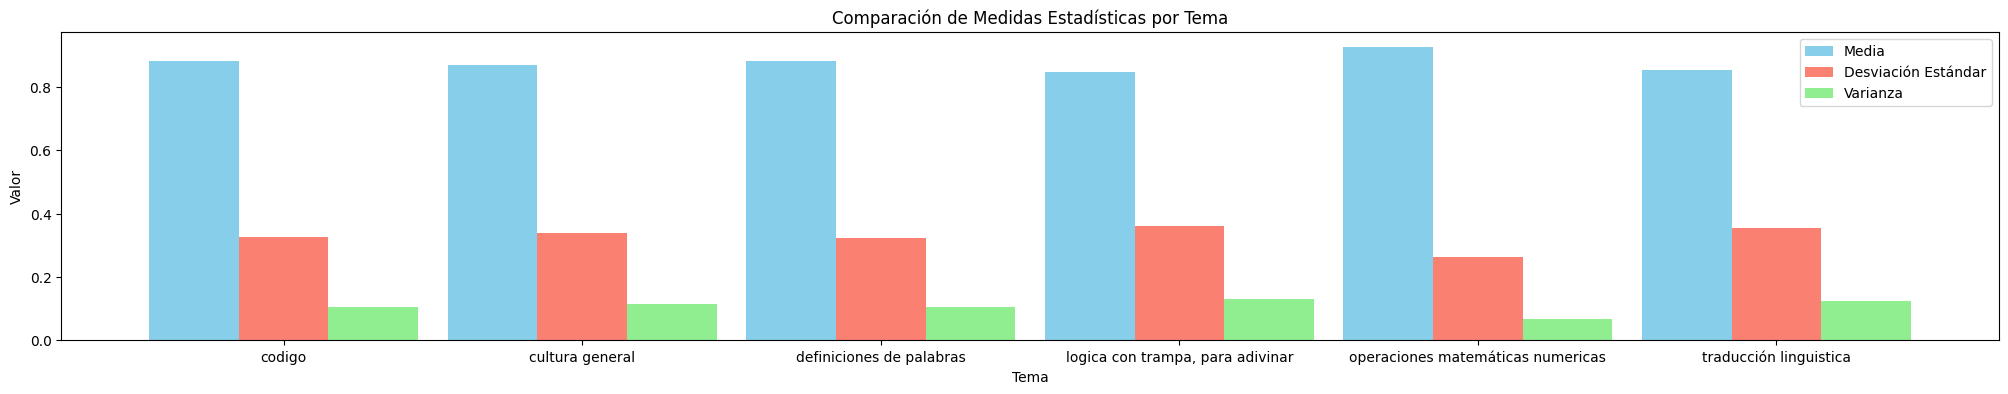

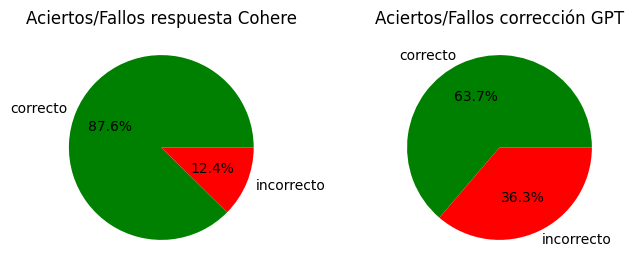

In [39]:
# Calcular la proporción de respuestas correctas e incorrectas
revisiones = resultados[resultados['revision'] != ""]
proporcionesCohere = resultados['resultado'].value_counts(normalize=True)
proporcionesGPT = revisiones['revision'].value_counts(normalize=True)

# cambiar valores de texto a numéricos
resultados['resultado_numerico'] = resultados['resultado'].map({'correcto': 1, 'incorrecto': 0})

# Calcular estadísticas generales
media_general = resultados['resultado_numerico'].mean()
desviacion_std_general = resultados['resultado_numerico'].std()
varianza_general = resultados['resultado_numerico'].var()

print(f"Media General: {media_general}")
print(f"Desviación Estándar General: {desviacion_std_general}")
print(f"Varianza General: {varianza_general}")

# Calcular estadísticas por 'tema'
estadisticas_por_tema = resultados.groupby('tema')['resultado_numerico'].agg(['mean', 'std', 'var'])
print(estadisticas_por_tema)

# Histograma de resultados generales
plt.figure(figsize=(5, 3))
plt.hist(resultados['resultado_numerico'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Resultados Generales')
plt.xlabel('Resultados')
plt.ylabel('Frecuencia')
plt.xticks([0.25, 0.75], ['Incorrecto', 'Correcto'])
plt.grid(True)
plt.show()

# Diagrama de barras para comparar medidas estadísticas por tema
plt.figure(figsize=(25, 4))
temas = estadisticas_por_tema.index
medias = estadisticas_por_tema['mean']
desviaciones_std = estadisticas_por_tema['std']
varianzas = estadisticas_por_tema['var']

x = range(len(temas))
width = 0.3

plt.bar(x, medias, width, label='Media', color='skyblue')
plt.bar([i + width for i in x], desviaciones_std, width, label='Desviación Estándar', color='salmon')
plt.bar([i + 2 * width for i in x], varianzas, width, label='Varianza', color='lightgreen')

plt.xlabel('Tema')
plt.ylabel('Valor')
plt.title('Comparación de Medidas Estadísticas por Tema')
plt.xticks([i + width for i in x], temas)
plt.legend()
plt.show()


# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Crear el gráfico circular en el segundo subplot
axs[0].pie(proporcionesCohere.values, labels=proporcionesCohere.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[0].set_title('Aciertos/Fallos respuesta Cohere')

axs[1].pie(proporcionesGPT.values, labels=proporcionesGPT.index, colors=['green', 'red'], autopct='%1.1f%%')
axs[1].set_title('Aciertos/Fallos corrección GPT')

plt.show()

## RECOPILACIÓN RESULTADOS CATEGORIAS



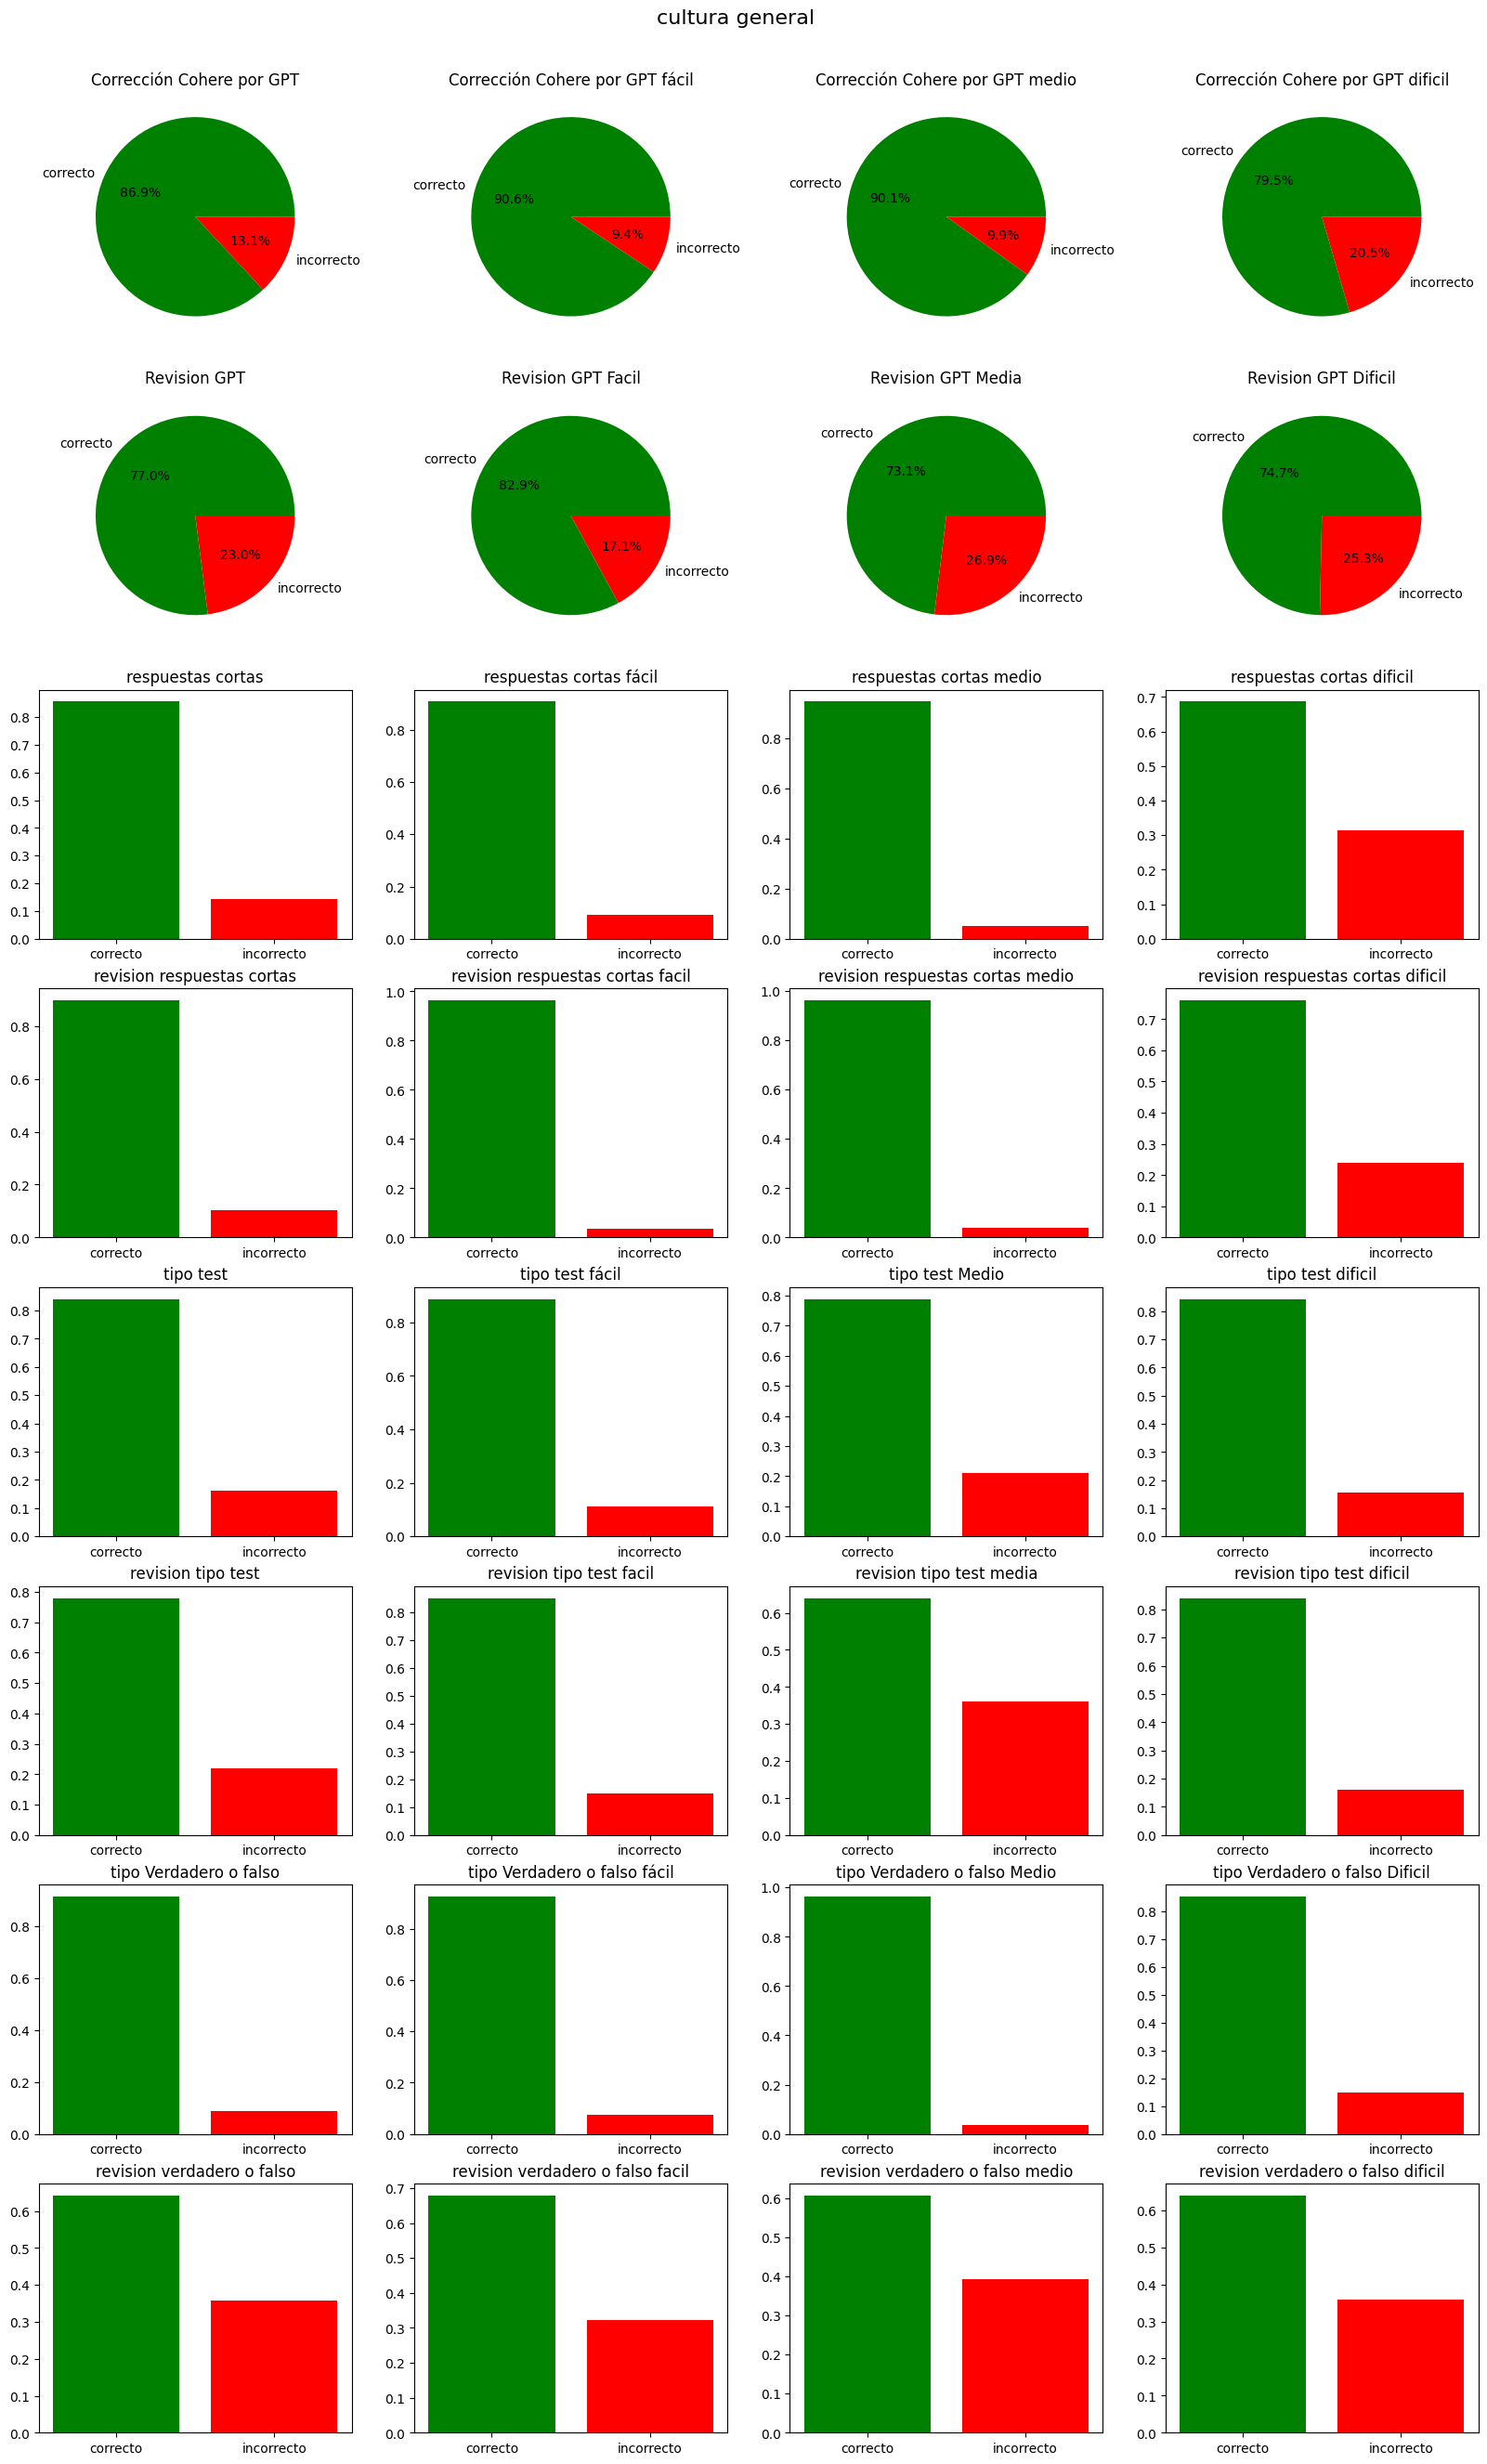

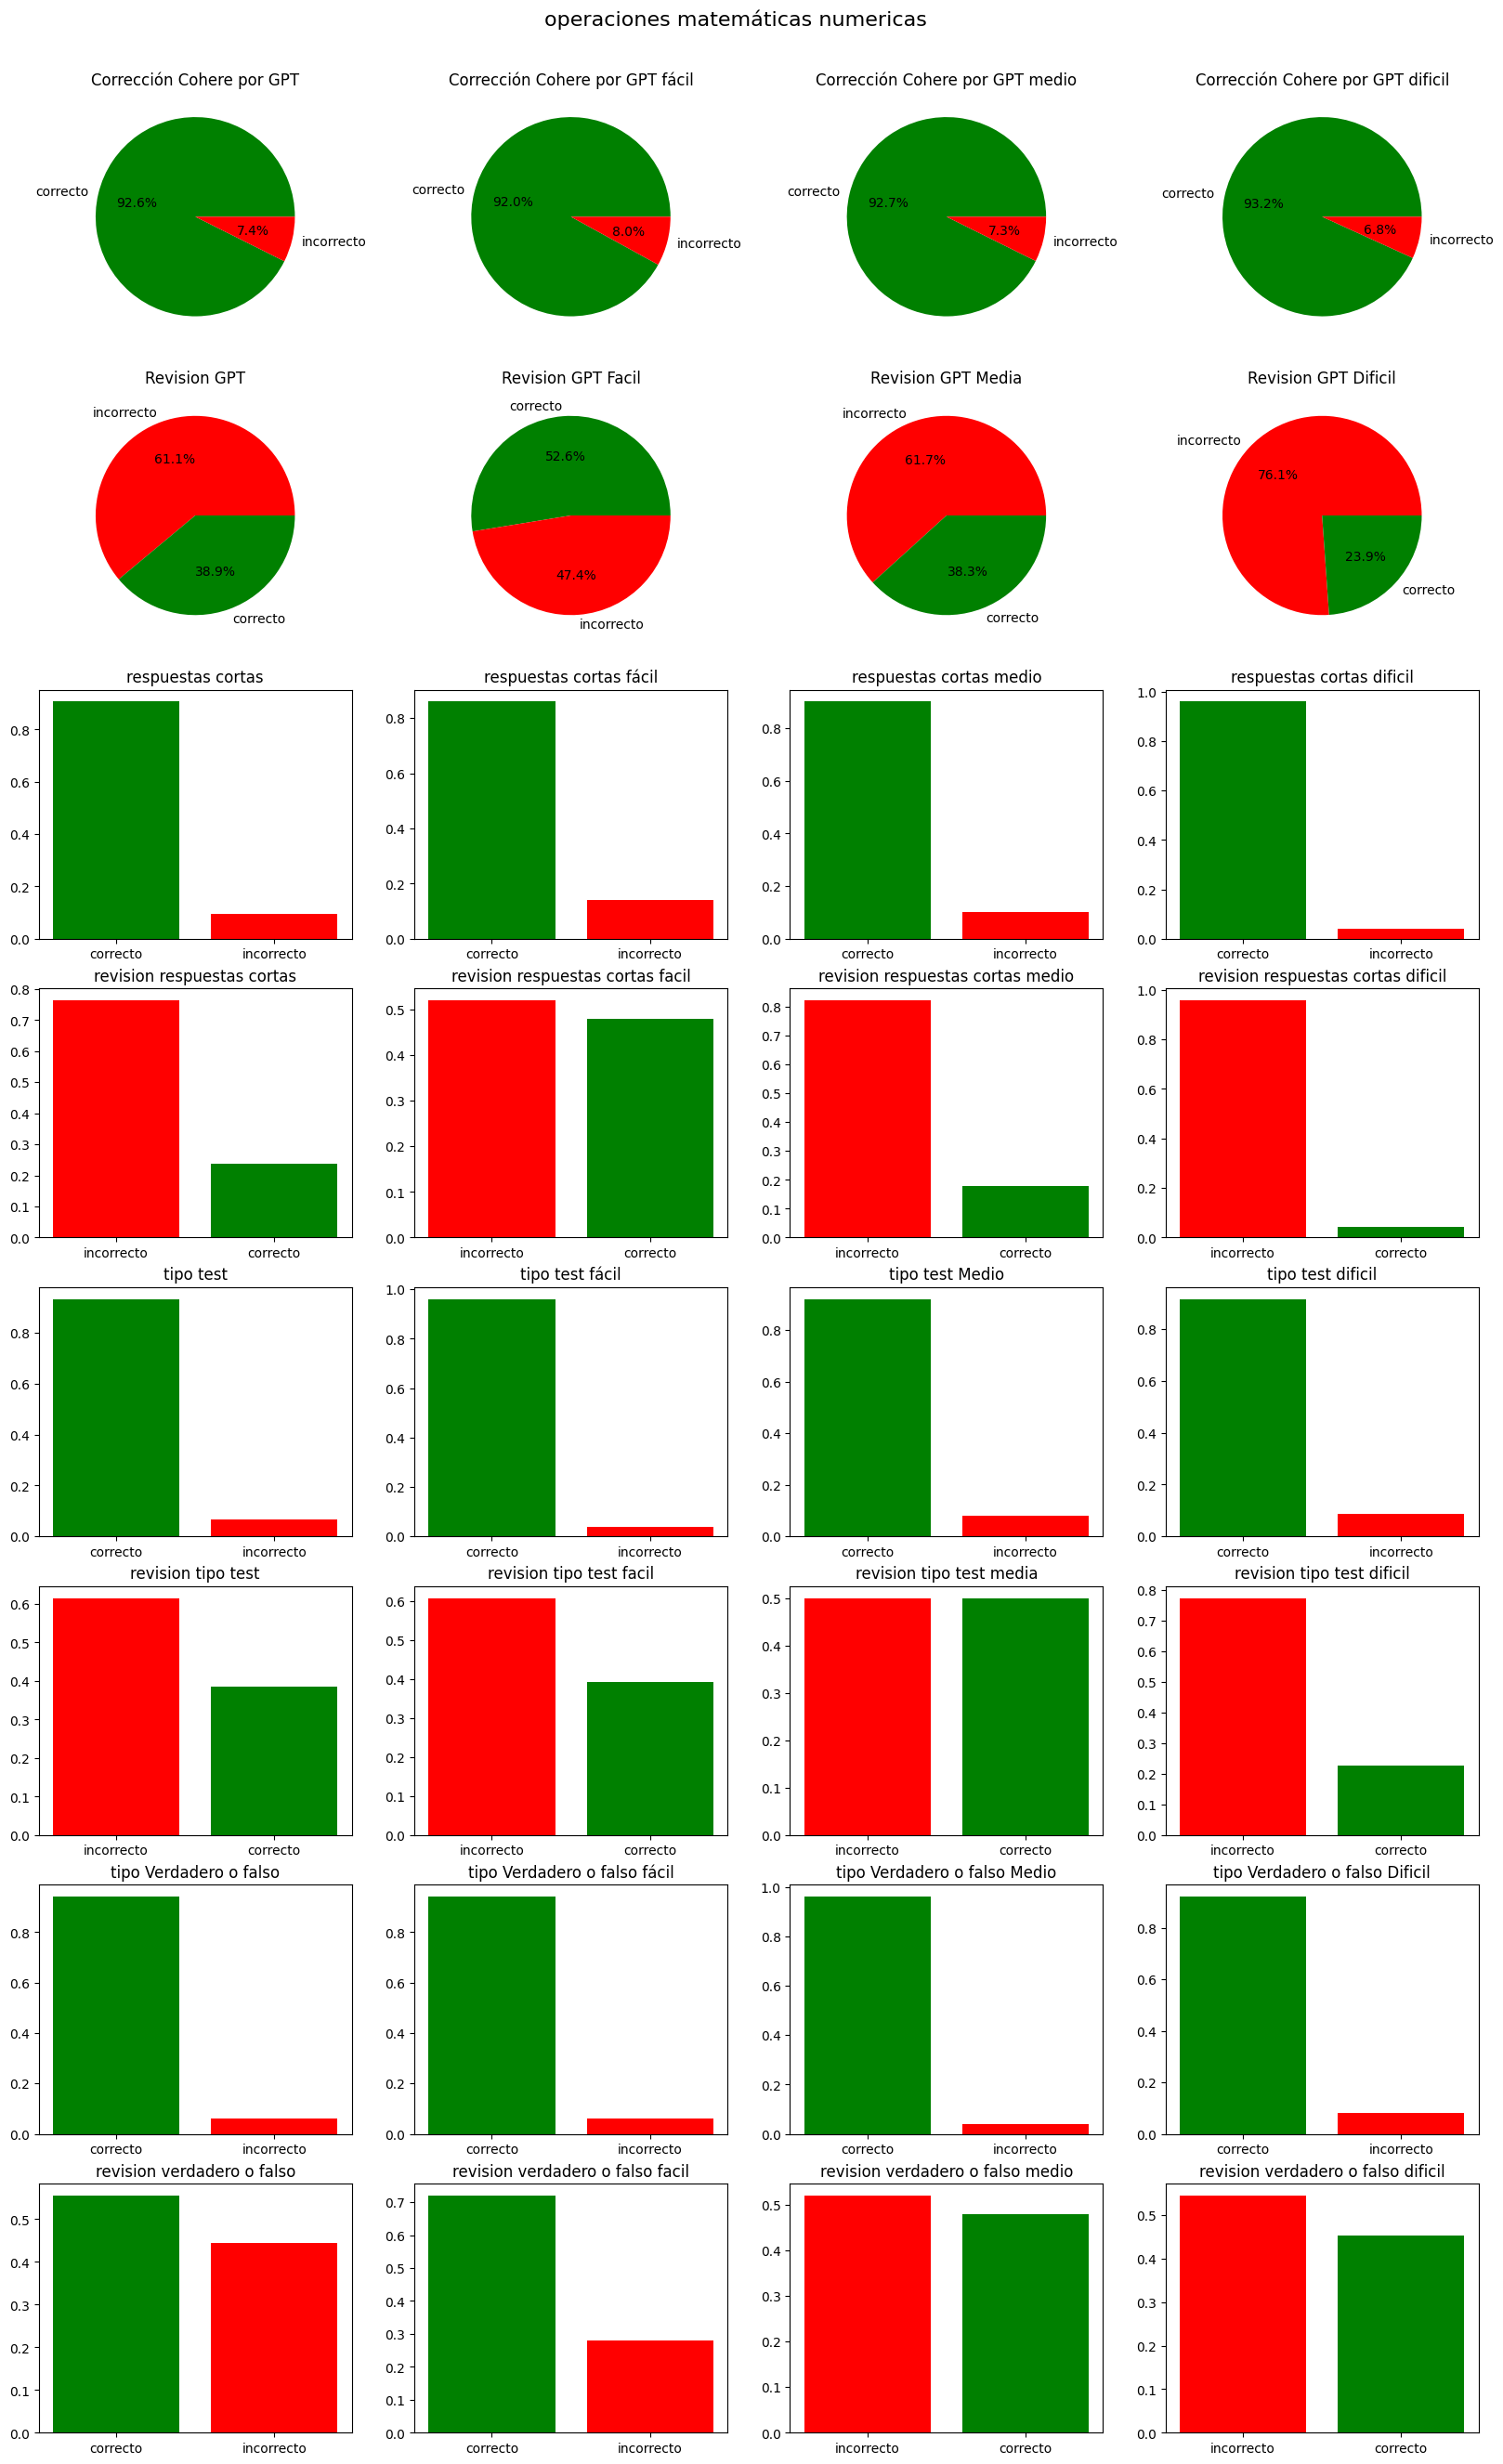

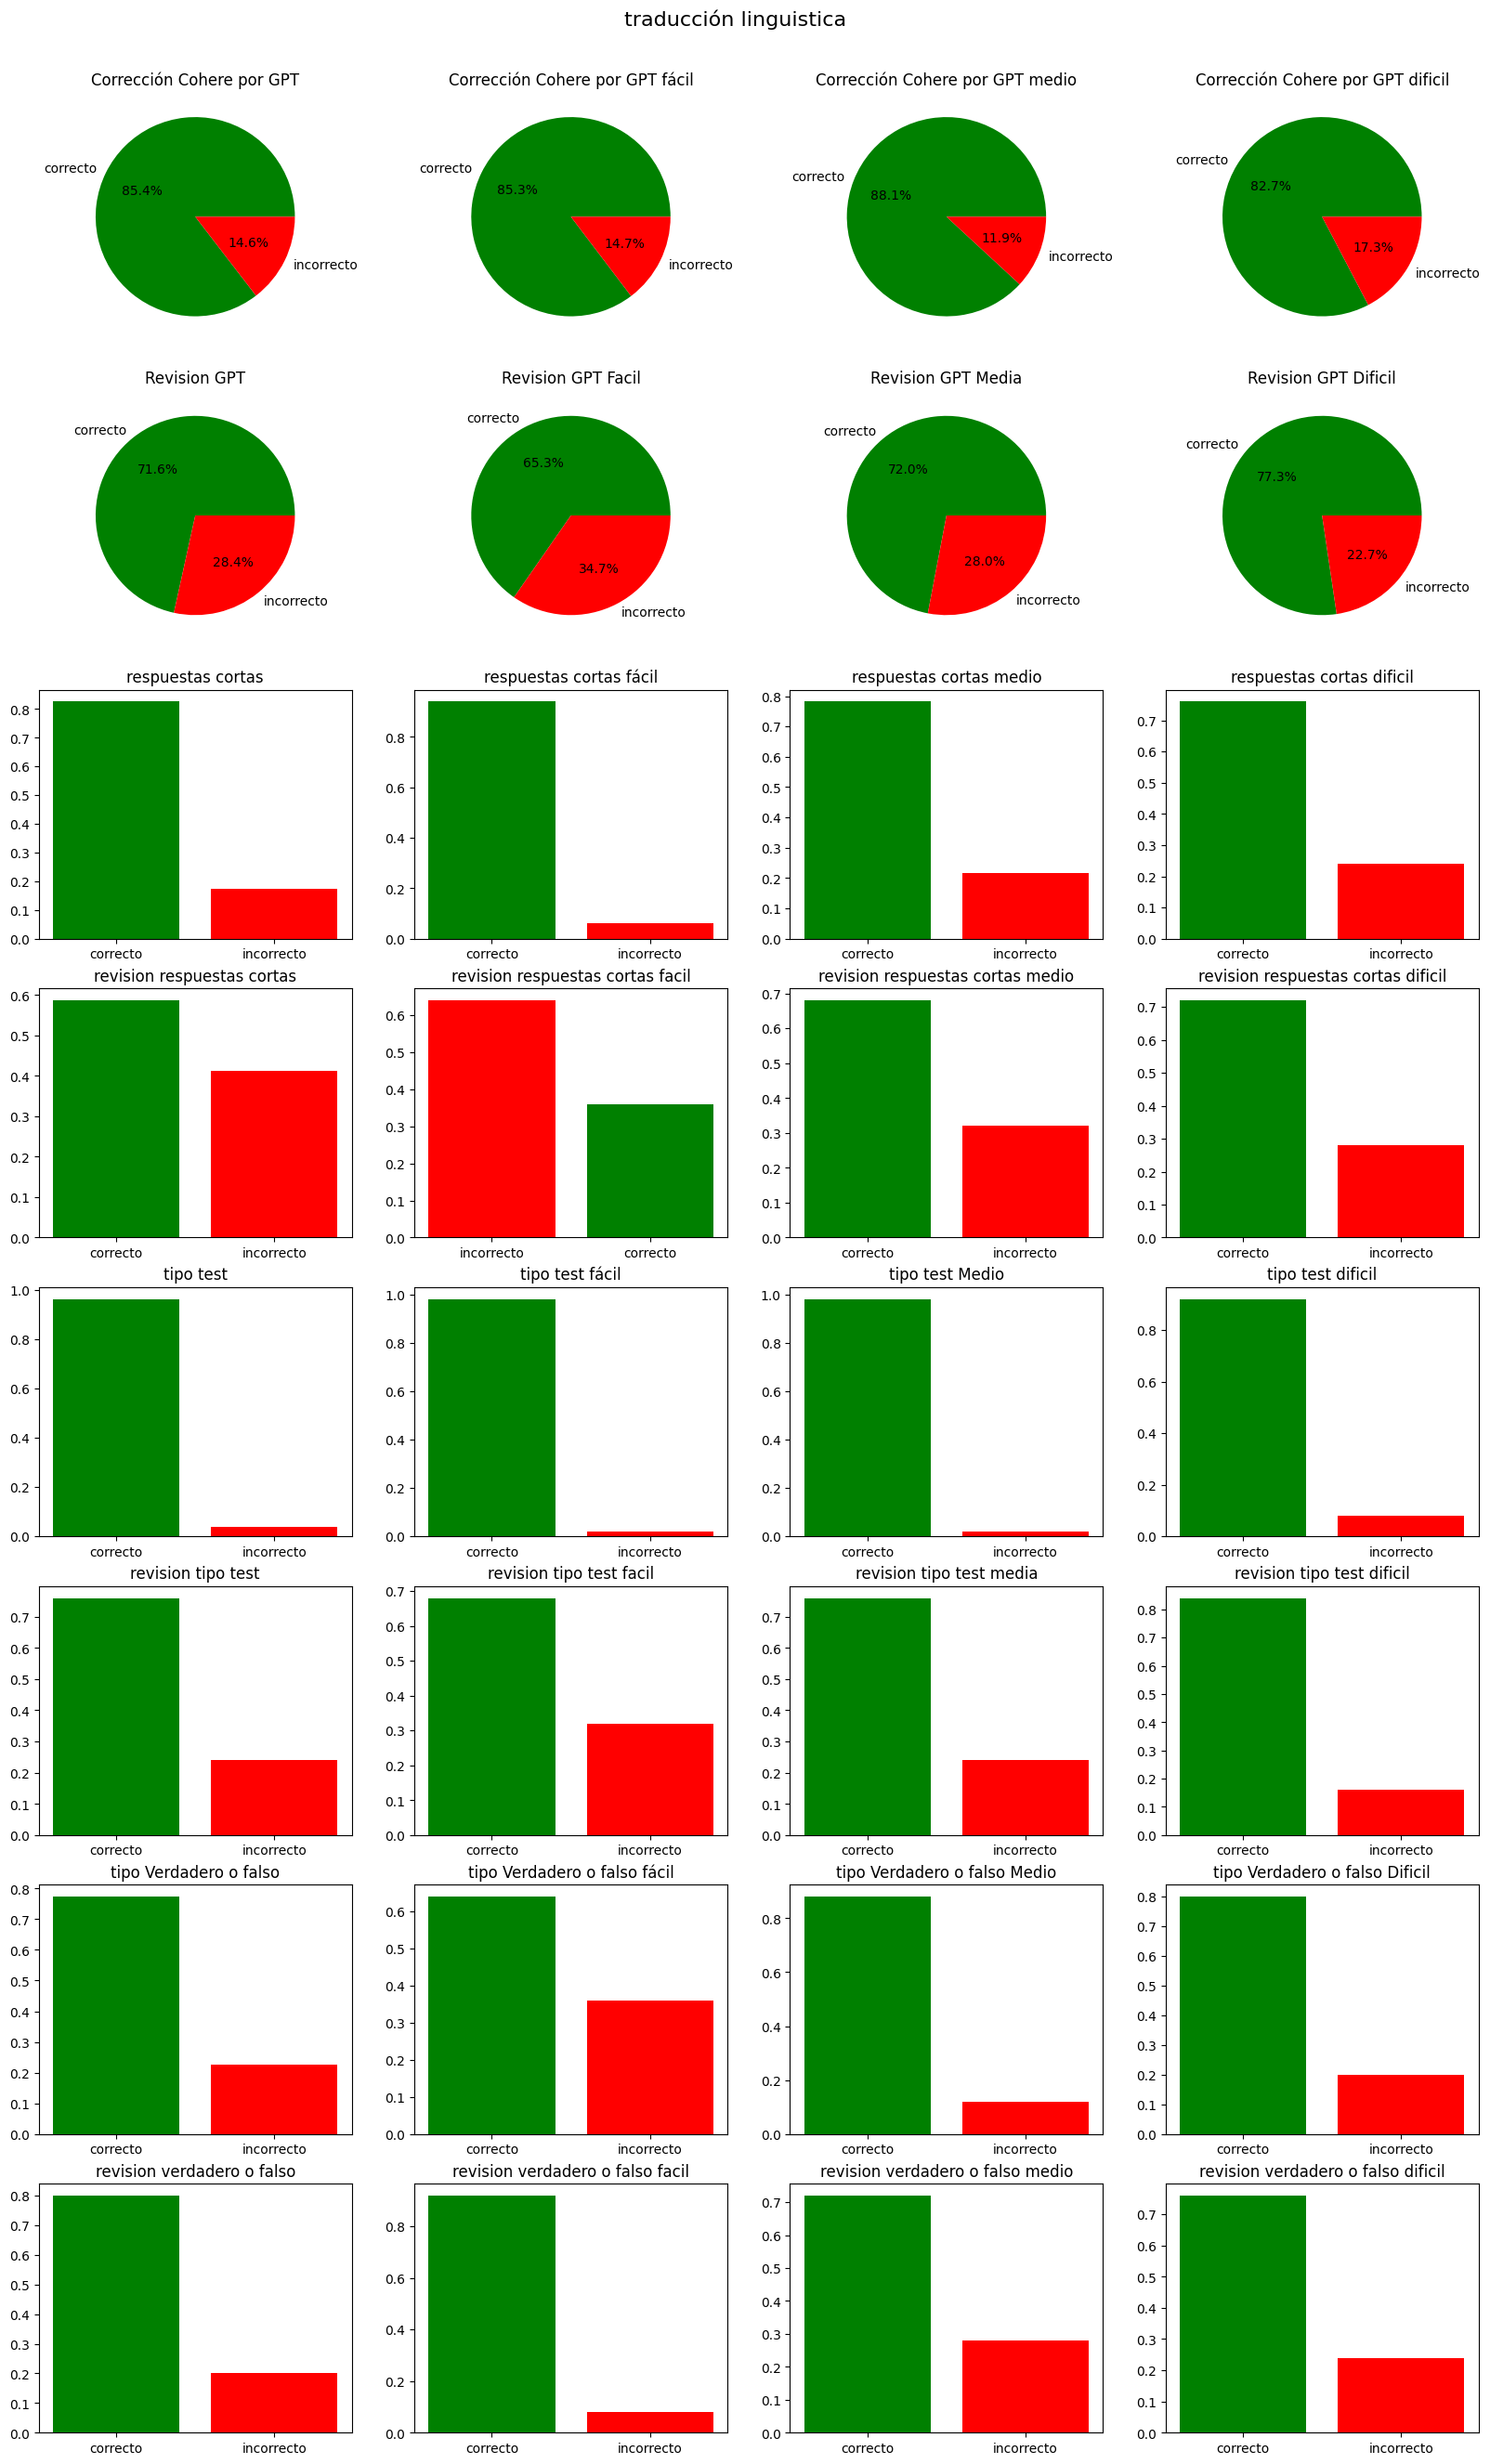

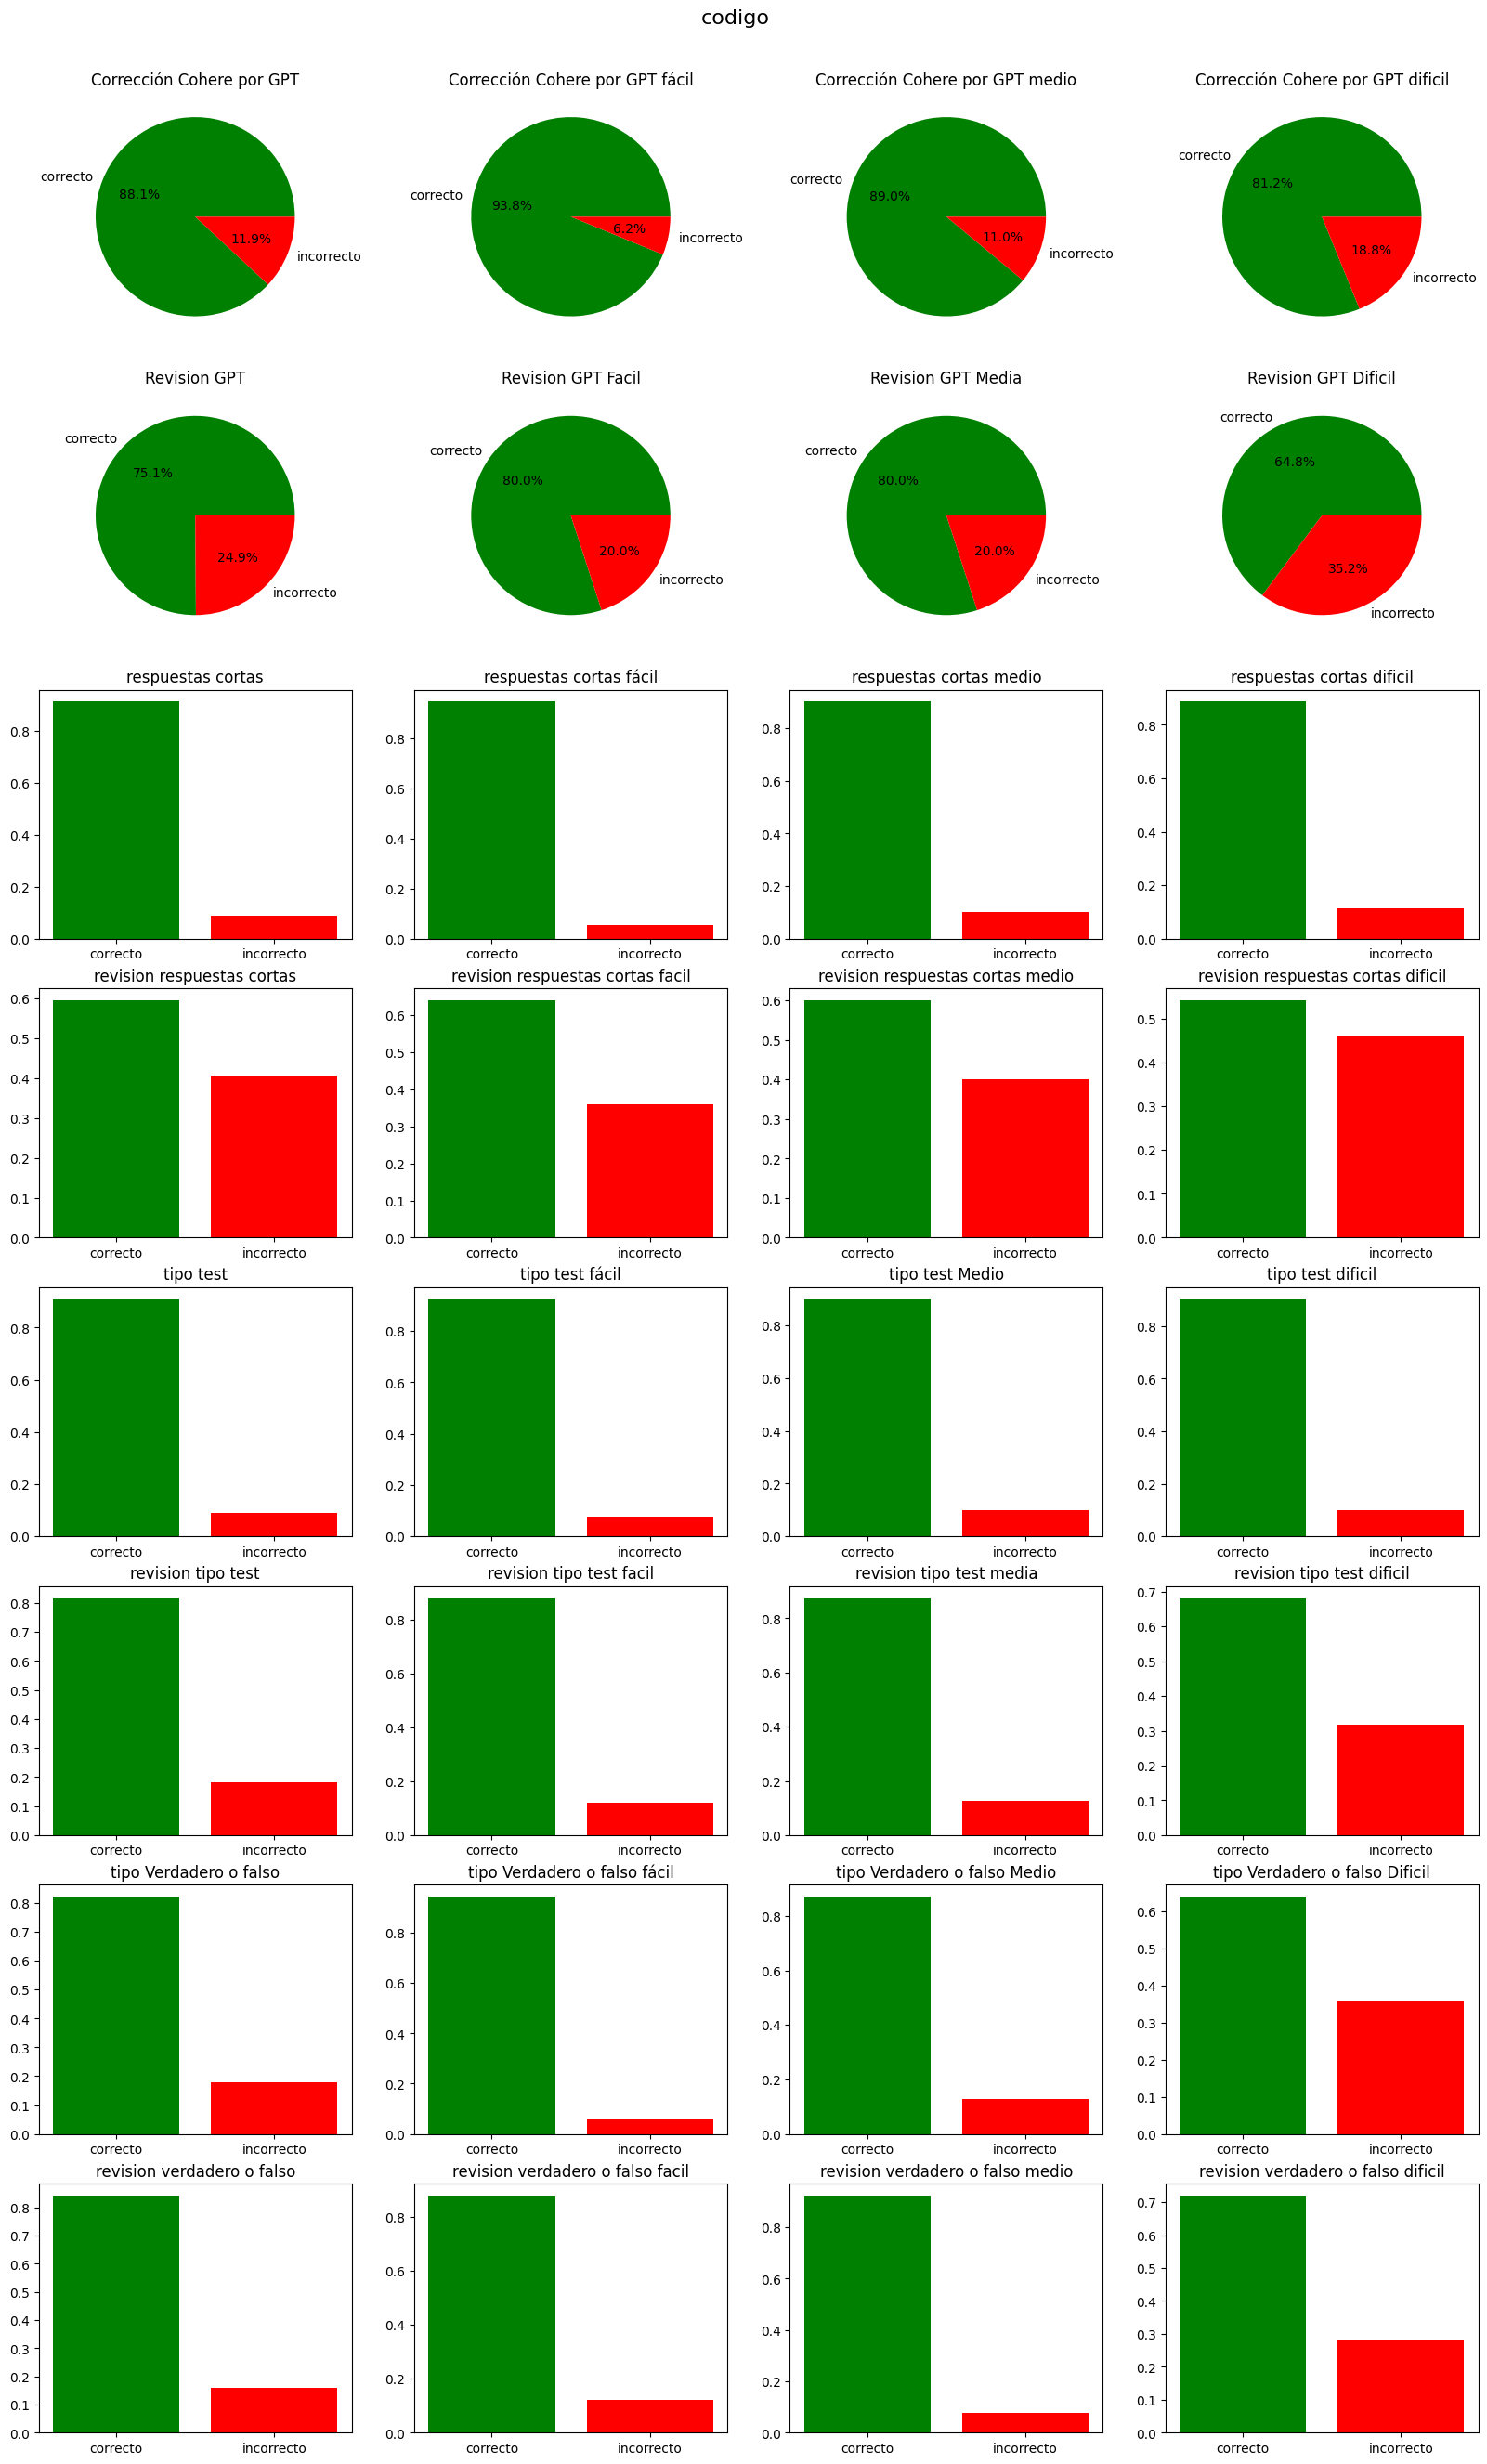

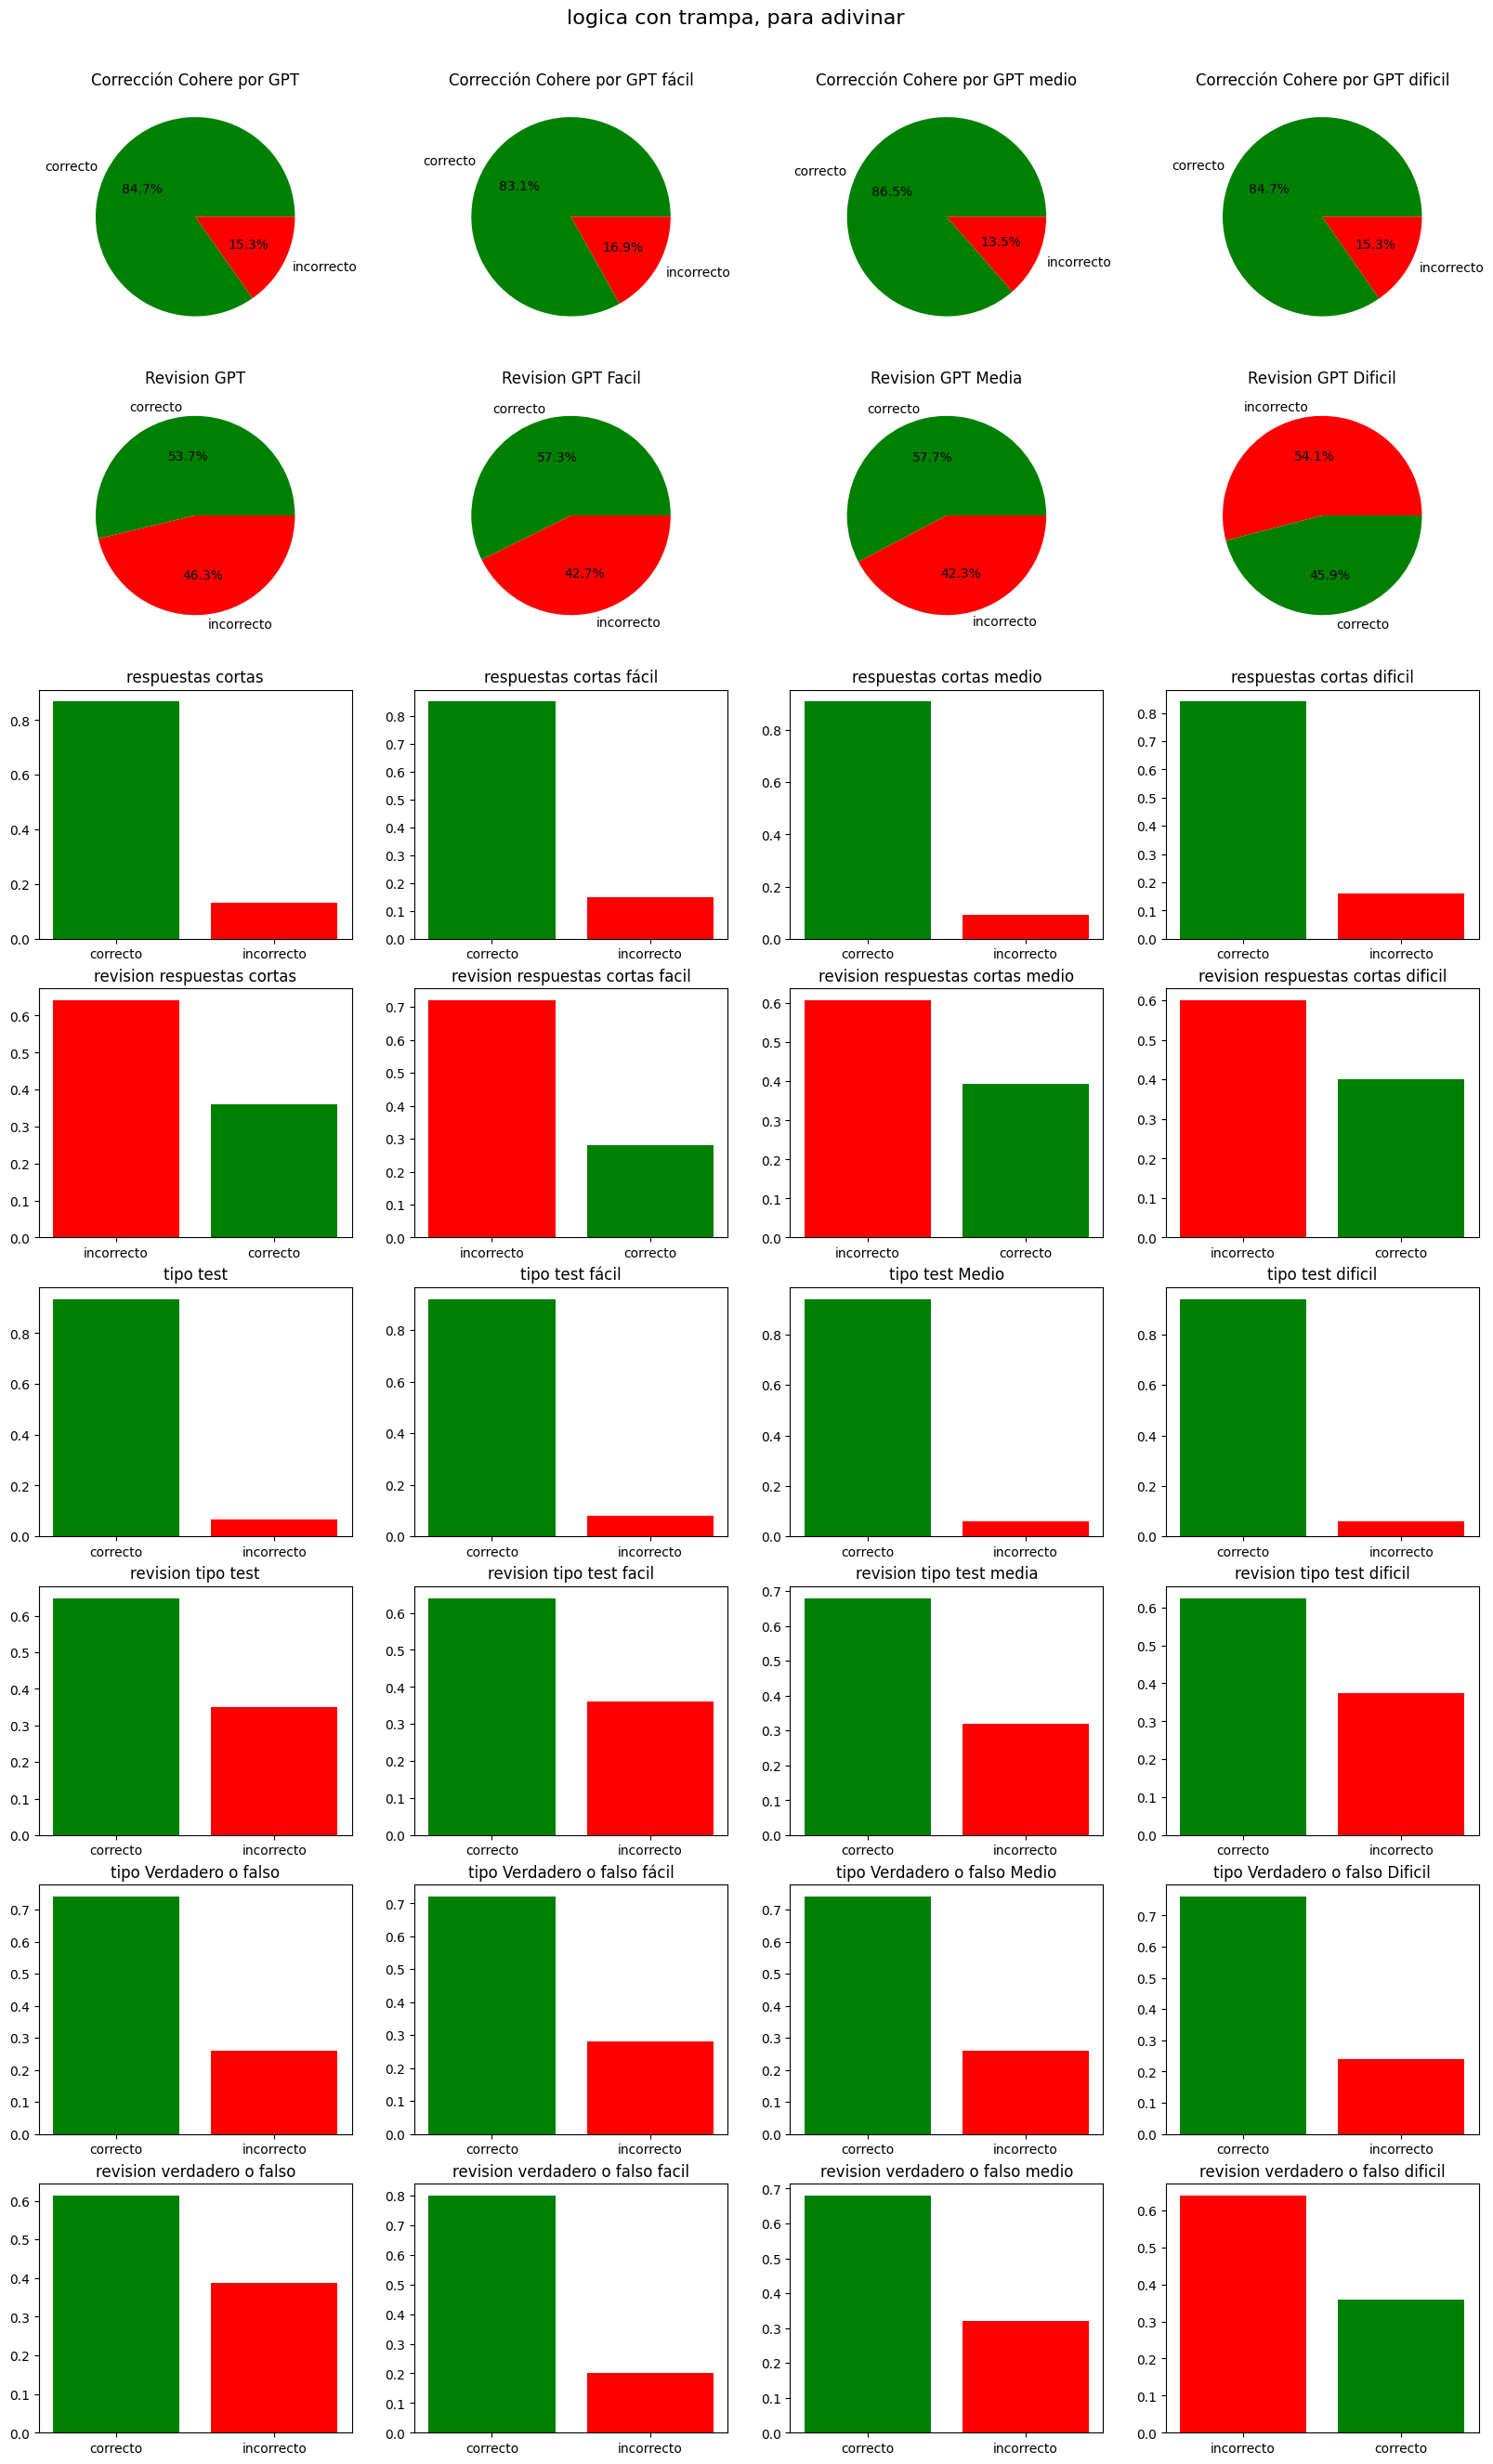

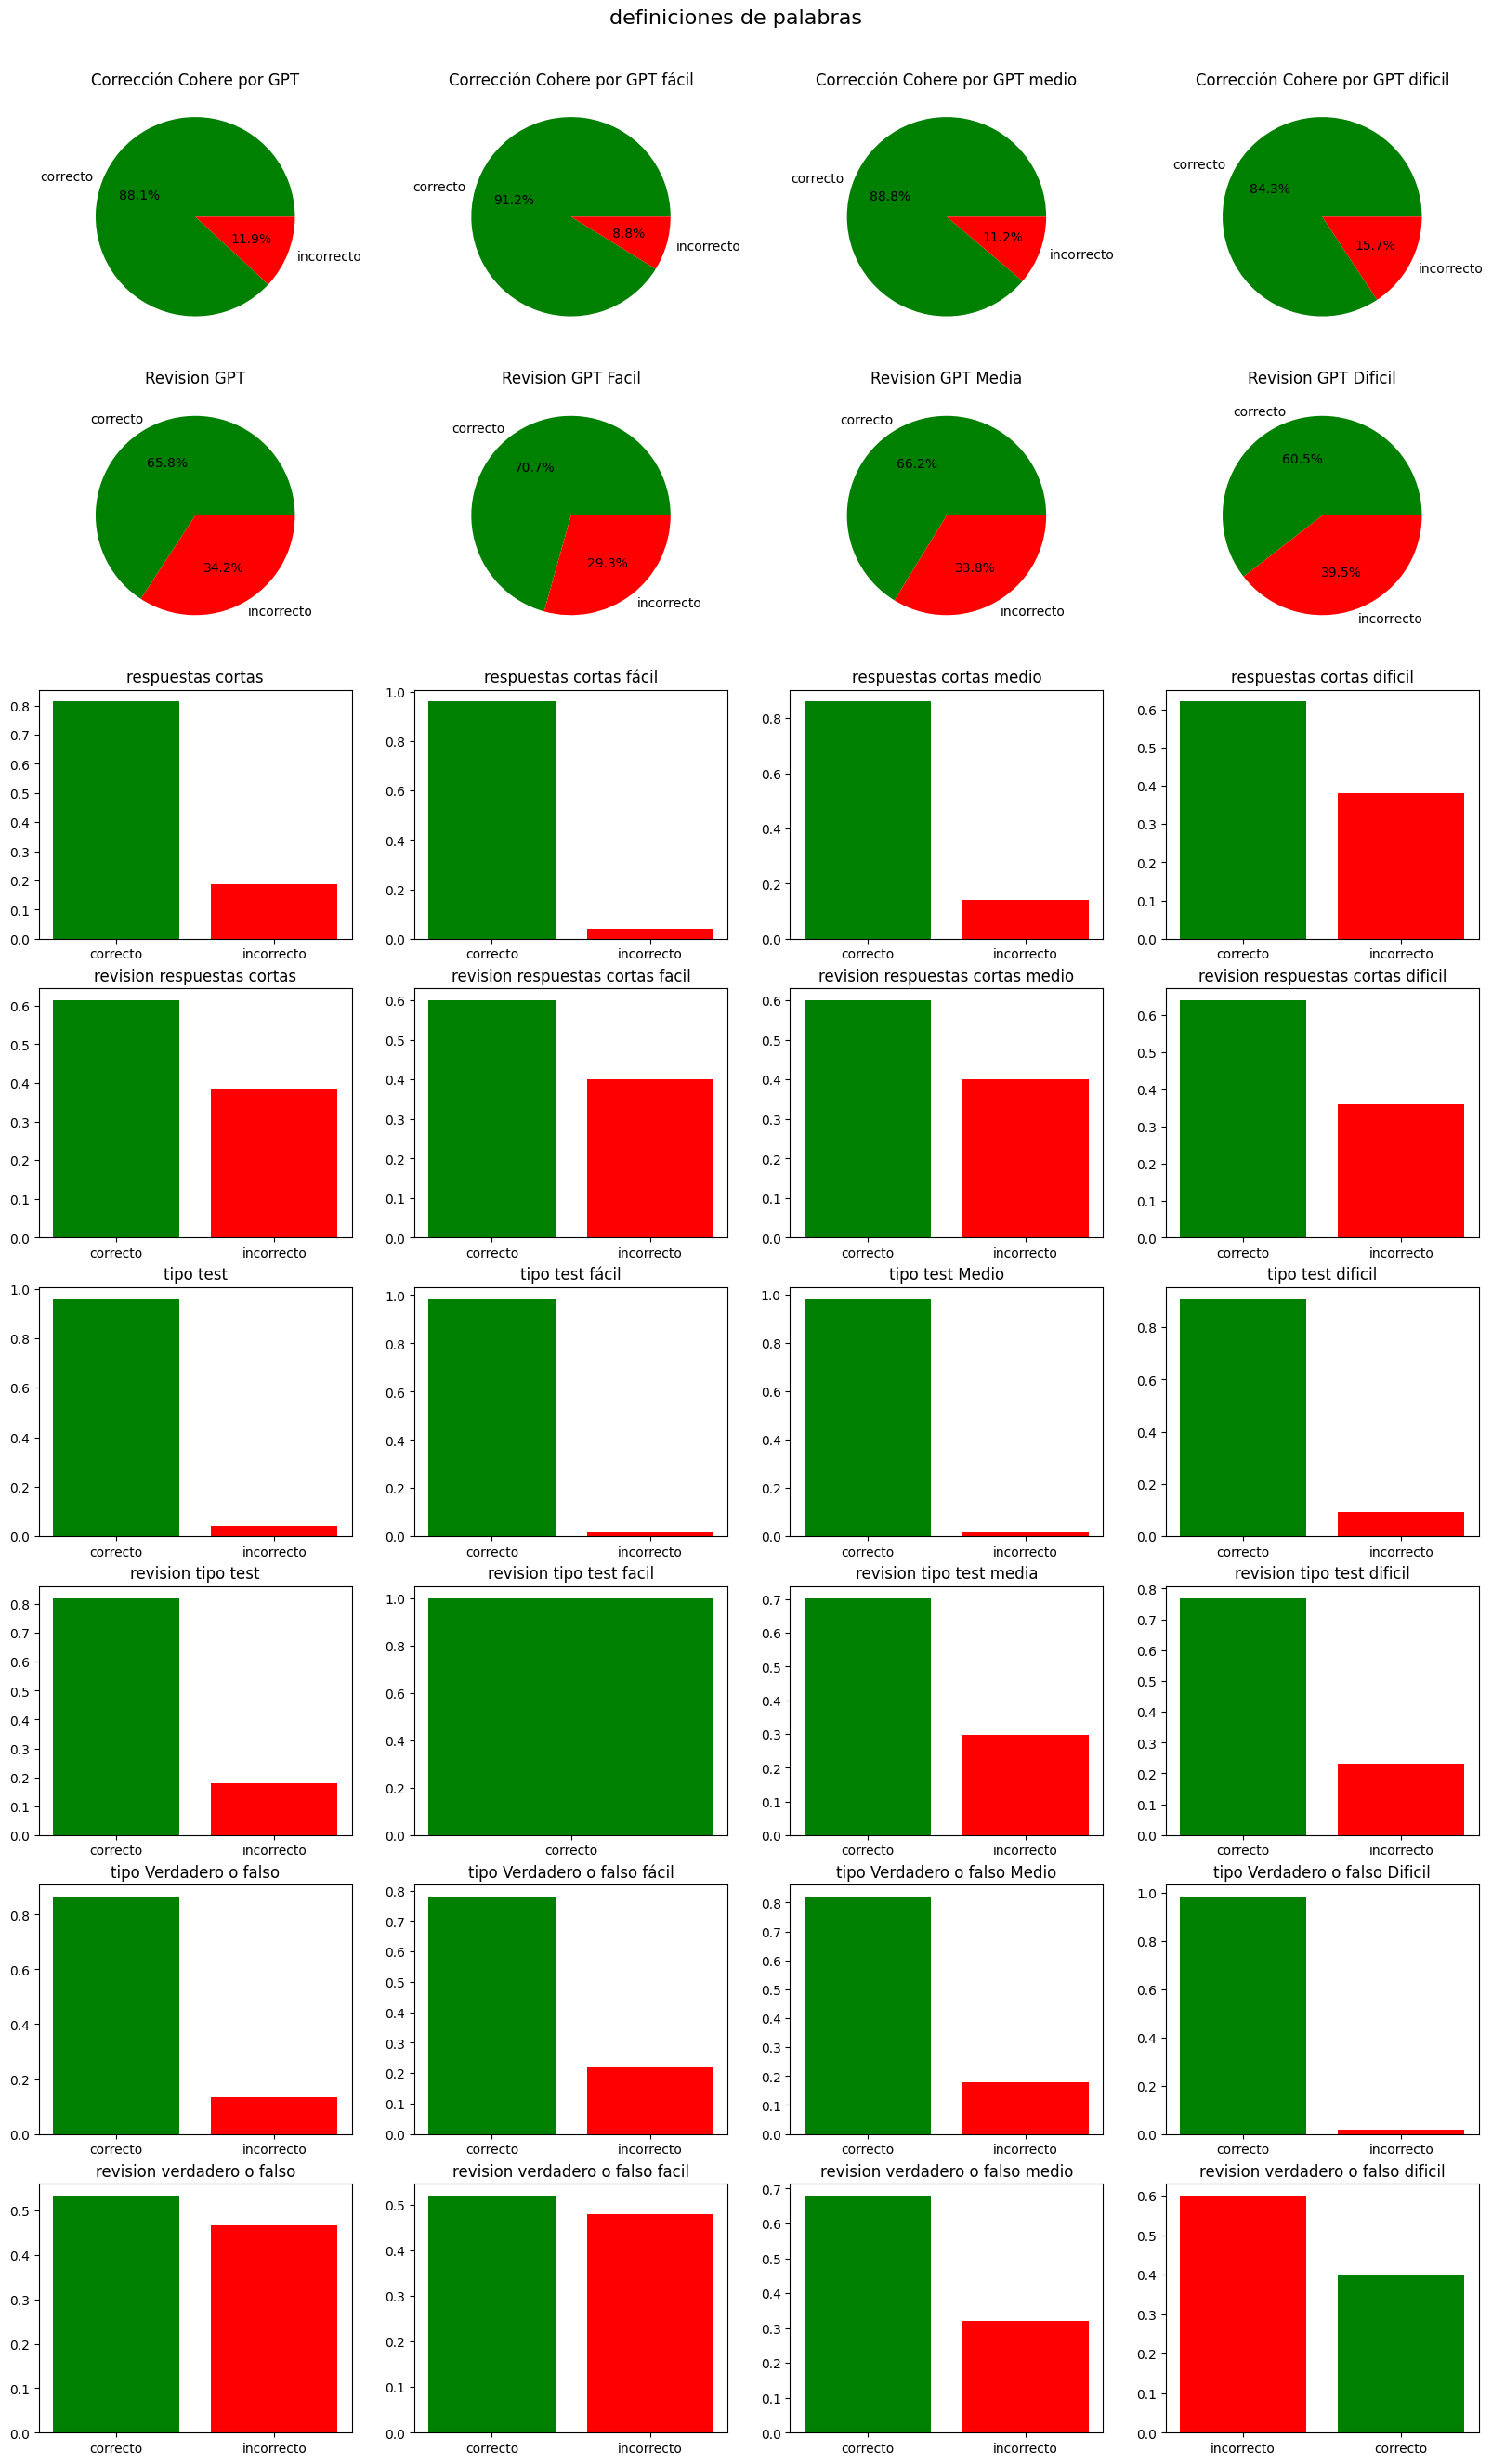

In [40]:
def colorElegir(result):
    if(result[0] == 'incorrecto'):
        return ['red', 'green']
    else:
        return ['green', 'red']

categorias_temas = ['cultura general', 'operaciones matemáticas numericas', 'traducción linguistica', 'codigo', 'logica con trampa, para adivinar', 'definiciones de palabras']

for categorias in categorias_temas:

    # Calcular la proporción de respuestas correctas e incorrectas
    general = resultados.loc[(resultados['tema'] == categorias)]
    generalFacil = resultados.loc[(resultados['tema'] == categorias) & (resultados['dificultad'] == 'fácil')]
    generalMedia = resultados.loc[(resultados['tema'] == categorias) & (resultados['dificultad'] == 'media')]
    generalDificil = resultados.loc[(resultados['tema'] == categorias) & (resultados['dificultad'] == 'difícil')]

    generalRevisiones = revisiones.loc[(revisiones['tema'] == categorias)]
    generalFacilRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['dificultad'] == 'fácil')]
    generalMediaRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['dificultad'] == 'media')]
    generalDificilRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['dificultad'] == 'difícil')]

    corta = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'respuesta corta')]
    cortaFacil = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'respuesta corta') & (resultados['dificultad'] == 'fácil')]
    cortaMedia = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'respuesta corta') & (resultados['dificultad'] == 'media')]
    cortaDificil = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'respuesta corta') & (resultados['dificultad'] == 'difícil')]

    cortaRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'respuesta corta')]
    cortaFacilRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'respuesta corta') & (revisiones['dificultad'] == 'fácil')]
    cortaMediaRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'respuesta corta') & (revisiones['dificultad'] == 'media')]
    cortaDificilRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'respuesta corta') & (revisiones['dificultad'] == 'difícil')]

    tetsRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'test con 3 opciones')]
    tetsFacilRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'test con 3 opciones') & (revisiones['dificultad'] == 'fácil')]
    tetsMediaRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'test con 3 opciones') & (revisiones['dificultad'] == 'media')]
    tetsDificilRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'test con 3 opciones') & (revisiones['dificultad'] == 'difícil')]

    tets = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'test con 3 opciones')]
    tetsFacil = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'test con 3 opciones') & (resultados['dificultad'] == 'fácil')]
    tetsMedia = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'test con 3 opciones') & (resultados['dificultad'] == 'media')]
    tetsDificil = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'test con 3 opciones') & (resultados['dificultad'] == 'difícil')]

    vof = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'verdadero o falso')]
    vofFacil = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'verdadero o falso') & (resultados['dificultad'] == 'fácil')]
    vofMedia = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'verdadero o falso') & (resultados['dificultad'] == 'media')]
    vofDificil = resultados.loc[(resultados['tema'] == categorias) & (resultados['tipo'] == 'verdadero o falso') & (resultados['dificultad'] == 'difícil')]

    vofRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'verdadero o falso')]
    vofFacilRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'verdadero o falso') & (revisiones['dificultad'] == 'fácil')]
    vofMediaRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'verdadero o falso') & (revisiones['dificultad'] == 'media')]
    vofDificilRevisiones = revisiones.loc[(revisiones['tema'] == categorias) & (revisiones['tipo'] == 'verdadero o falso') & (revisiones['dificultad'] == 'difícil')]

    proporcionesCohere = general['resultado'].value_counts(normalize=True)
    proporcionesCohereFacil = generalFacil['resultado'].value_counts(normalize=True)
    proporcionesCohereMedia = generalMedia['resultado'].value_counts(normalize=True)
    proporcionesCohereDificil = generalDificil['resultado'].value_counts(normalize=True)

    proporcionesGPT = generalRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTFacil = generalFacilRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTMedia = generalMediaRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTDificil = generalDificilRevisiones['revision'].value_counts(normalize=True)

    proporcionesCohereCorta = corta['resultado'].value_counts(normalize=True)
    proporcionesCohereTest = tets['resultado'].value_counts(normalize=True)
    proporcionesCohereVof = vof['resultado'].value_counts(normalize=True)

    proporcionesGPTCorta = cortaRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTTest = tetsRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTVof = vofRevisiones['revision'].value_counts(normalize=True)

    proporcionesCohereCortaFacil = cortaFacil['resultado'].value_counts(normalize=True)
    proporcionesCohereTestFacil = tetsFacil['resultado'].value_counts(normalize=True)
    proporcionesCohereVofFacil = vofFacil['resultado'].value_counts(normalize=True)

    proporcionesGPTCortaFacil = cortaFacilRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTTestFacil = tetsFacilRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTVofFacil = vofFacilRevisiones['revision'].value_counts(normalize=True)

    proporcionesCohereCortaMedia = cortaMedia['resultado'].value_counts(normalize=True)
    proporcionesCohereTestMedia = tetsMedia['resultado'].value_counts(normalize=True)
    proporcionesCohereVofMedia = vofMedia['resultado'].value_counts(normalize=True)

    proporcionesGPTCortaMedia = cortaMediaRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTTestMedia = tetsMediaRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTVofMedia = vofMediaRevisiones['revision'].value_counts(normalize=True)

    proporcionesCohereCortaDificil = cortaDificil['resultado'].value_counts(normalize=True)
    proporcionesCohereTestDificil = tetsDificil['resultado'].value_counts(normalize=True)
    proporcionesCohereVofDificil = vofDificil['resultado'].value_counts(normalize=True)

    proporcionesGPTCortaDificil = cortaDificilRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTTestDificil = tetsDificilRevisiones['revision'].value_counts(normalize=True)
    proporcionesGPTVofDificil = vofDificilRevisiones['revision'].value_counts(normalize=True)


    fig, axs = plt.subplots(8, 4, figsize=(20, 30))

    # Colocar el título de la categoría
    fig.suptitle(categorias, fontsize=16)
    plt.subplots_adjust(top=0.95)

    # Crear el gráfico circular en el segundo subplot
    axs[0][0].pie(proporcionesCohere.values, labels=proporcionesCohere.index, colors=colorElegir(proporcionesCohere.index), autopct='%1.1f%%')
    axs[0][0].set_title('Corrección Cohere por GPT')


    axs[0][1].pie(proporcionesCohereFacil.values, labels=proporcionesCohereFacil.index, colors=colorElegir(proporcionesCohereFacil.index), autopct='%1.1f%%')
    axs[0][1].set_title('Corrección Cohere por GPT fácil')

    axs[0][2].pie(proporcionesCohereMedia.values, labels=proporcionesCohereMedia.index, colors=colorElegir(proporcionesCohereMedia.index), autopct='%1.1f%%')
    axs[0][2].set_title('Corrección Cohere por GPT medio')

    axs[0][3].pie(proporcionesCohereDificil.values, labels=proporcionesCohereDificil.index, colors=colorElegir(proporcionesCohereDificil.index), autopct='%1.1f%%')
    axs[0][3].set_title('Corrección Cohere por GPT dificil')

    #revision gpt general
    axs[1][0].pie(proporcionesGPT.values, labels=proporcionesGPT.index, colors=colorElegir(proporcionesGPT.index), autopct='%1.1f%%')
    axs[1][0].set_title('Revision GPT')

    axs[1][1].pie(proporcionesGPTFacil.values, labels=proporcionesGPTFacil.index, colors=colorElegir(proporcionesGPTFacil.index), autopct='%1.1f%%')
    axs[1][1].set_title('Revision GPT Facil')

    axs[1][2].pie(proporcionesGPTMedia.values, labels=proporcionesGPTMedia.index, colors=colorElegir(proporcionesGPTMedia.index), autopct='%1.1f%%')
    axs[1][2].set_title('Revision GPT Media')

    axs[1][3].pie(proporcionesGPTDificil.values, labels=proporcionesGPTDificil.index, colors=colorElegir(proporcionesGPTDificil.index), autopct='%1.1f%%')
    axs[1][3].set_title('Revision GPT Dificil')

    axs[2][0].bar(proporcionesCohereCorta.index, proporcionesCohereCorta.values, color=colorElegir(proporcionesCohereCorta.index))
    axs[2][0].set_title('respuestas cortas')

    axs[2][1].bar(proporcionesCohereCortaFacil.index, proporcionesCohereCortaFacil.values, color=colorElegir(proporcionesCohereCortaFacil.index))
    axs[2][1].set_title('respuestas cortas fácil')

    axs[2][2].bar(proporcionesCohereCortaMedia.index, proporcionesCohereCortaMedia.values, color=colorElegir(proporcionesCohereCortaMedia.index))
    axs[2][2].set_title('respuestas cortas medio')

    axs[2][3].bar(proporcionesCohereCortaDificil.index, proporcionesCohereCortaDificil.values, color=colorElegir(proporcionesCohereCortaDificil.index))
    axs[2][3].set_title('respuestas cortas dificil')

    axs[3][0].bar(proporcionesGPTCorta.index, proporcionesGPTCorta.values, color=colorElegir(proporcionesGPTCorta.index))
    axs[3][0].set_title('revision respuestas cortas')

    axs[3][1].bar(proporcionesGPTCortaFacil.index, proporcionesGPTCortaFacil.values, color=colorElegir(proporcionesGPTCortaFacil.index))
    axs[3][1].set_title('revision respuestas cortas facil')

    axs[3][2].bar(proporcionesGPTCortaMedia.index, proporcionesGPTCortaMedia.values, color=colorElegir(proporcionesGPTCortaMedia.index))
    axs[3][2].set_title('revision respuestas cortas medio')

    axs[3][3].bar(proporcionesGPTCortaDificil.index, proporcionesGPTCortaDificil.values, color=colorElegir(proporcionesGPTCortaDificil.index))
    axs[3][3].set_title('revision respuestas cortas dificil')

    axs[4][0].bar(proporcionesCohereTest.index, proporcionesCohereTest.values, color=colorElegir(proporcionesCohereTest.index))
    axs[4][0].set_title('tipo test')

    axs[4][1].bar(proporcionesCohereTestFacil.index, proporcionesCohereTestFacil.values, color=colorElegir(proporcionesCohereTestFacil.index))
    axs[4][1].set_title('tipo test fácil')

    axs[4][2].bar(proporcionesCohereTestMedia.index, proporcionesCohereTestMedia.values, color=colorElegir(proporcionesCohereTestMedia.index))
    axs[4][2].set_title('tipo test Medio')

    axs[4][3].bar(proporcionesCohereTestDificil.index, proporcionesCohereTestDificil.values, color=colorElegir(proporcionesCohereTestDificil.index))
    axs[4][3].set_title('tipo test dificil')

    axs[5][0].bar(proporcionesGPTTest.index, proporcionesGPTTest.values, color=colorElegir(proporcionesGPTTest.index))
    axs[5][0].set_title('revision tipo test')

    axs[5][1].bar(proporcionesGPTTestFacil.index, proporcionesGPTTestFacil.values, color=colorElegir(proporcionesGPTTestFacil.index))
    axs[5][1].set_title('revision tipo test facil')

    axs[5][2].bar(proporcionesGPTTestMedia.index, proporcionesGPTTestMedia.values, color=colorElegir(proporcionesGPTTestMedia.index))
    axs[5][2].set_title('revision tipo test media')

    axs[5][3].bar(proporcionesGPTTestDificil.index, proporcionesGPTTestDificil.values, color=colorElegir(proporcionesGPTTestDificil.index))
    axs[5][3].set_title('revision tipo test dificil')

    axs[6][0].bar(proporcionesCohereVof.index, proporcionesCohereVof.values, color=colorElegir(proporcionesCohereVof.index))
    axs[6][0].set_title('tipo Verdadero o falso')

    axs[6][1].bar(proporcionesCohereVofFacil.index, proporcionesCohereVofFacil.values, color=colorElegir(proporcionesCohereVofFacil.index))
    axs[6][1].set_title('tipo Verdadero o falso fácil')

    axs[6][2].bar(proporcionesCohereVofMedia.index, proporcionesCohereVofMedia.values, color=colorElegir(proporcionesCohereVofMedia.index))
    axs[6][2].set_title('tipo Verdadero o falso Medio')

    axs[6][3].bar(proporcionesCohereVofDificil.index, proporcionesCohereVofDificil.values, color=colorElegir(proporcionesCohereVofDificil.index))
    axs[6][3].set_title('tipo Verdadero o falso Dificil')

    axs[7][0].bar(proporcionesGPTVof.index, proporcionesGPTVof.values, color=colorElegir(proporcionesGPTVof.index))
    axs[7][0].set_title('revision verdadero o falso')

    axs[7][1].bar(proporcionesGPTVofFacil.index, proporcionesGPTVofFacil.values, color=colorElegir(proporcionesGPTVofFacil.index))
    axs[7][1].set_title('revision verdadero o falso facil')

    axs[7][2].bar(proporcionesGPTVofMedia.index, proporcionesGPTVofMedia.values, color=colorElegir(proporcionesGPTVofMedia.index))
    axs[7][2].set_title('revision verdadero o falso medio')

    axs[7][3].bar(proporcionesGPTVofDificil.index, proporcionesGPTVofDificil.values, color=colorElegir(proporcionesGPTVofDificil.index))
    axs[7][3].set_title('revision verdadero o falso dificil')
        

    plt.show()


In [41]:
print("cultura general" ,len(resultados.loc[(resultados['tema'] == 'codigo') & (resultados['tipo'] == 'respuesta corta')& (resultados['dificultad'] == 'media')]))
print("cultura general revisiones " ,len(revisiones.loc[(revisiones['tema'] == 'codigo')& (revisiones['tipo'] == 'respuesta corta')& (revisiones['dificultad'] == 'media')]))

print("codigo" ,len(resultados.loc[(resultados['tema'] == 'codigo')& (resultados['tipo'] == 'respuesta corta')]))
print("codigo revisiones " ,len(revisiones.loc[(revisiones['tema'] == 'codigo')& (revisiones['tipo'] == 'respuesta corta')]))

print("operaciones matemáticas numericas" , len(resultados.loc[(resultados['tema'] == 'operaciones matemáticas numericas')&(resultados['tipo'] == 'verdadero o falso')]))
print("operaciones matemáticas numericas revisiones " ,len(revisiones.loc[(revisiones['tema'] == 'operaciones matemáticas numericas')&(revisiones['tipo'] == 'verdadero o falso')]))

print("traducción linguistica" , len(resultados.loc[(resultados['tema'] == 'traducción linguistica')&(resultados['tipo'] == 'respuesta corta')]))
print("traducción linguistica revisiones " ,len(revisiones.loc[(revisiones['tema'] == 'traducción linguistica')&(revisiones['tipo'] == 'respuesta corta')]))

print("logica con trampa, para adivinar" , len(resultados.loc[(resultados['tema'] == 'logica con trampa, para adivinar')&(resultados['tipo'] == 'verdadero o falso')]))
print("logica con trampa, para adivinar revisiones " ,len(revisiones.loc[(revisiones['tema'] == 'logica con trampa, para adivinar')&(revisiones['tipo'] == 'verdadero o falso')]))

print("definiciones de palabras" , len(resultados.loc[(resultados['tema'] == 'definiciones de palabras')&(resultados['tipo'] == 'respuesta corta')]))
print("definiciones de palabras revisiones " ,len(revisiones.loc[(revisiones['tema'] == 'definiciones de palabras')&(revisiones['tipo'] == 'respuesta corta')]))


cultura general 50
cultura general revisiones  25
codigo 158
codigo revisiones  74
operaciones matemáticas numericas 150
operaciones matemáticas numericas revisiones  72
traducción linguistica 155
traducción linguistica revisiones  75
logica con trampa, para adivinar 150
logica con trampa, para adivinar revisiones  75
definiciones de palabras 150
definiciones de palabras revisiones  75
